### Part-1 Exploratory Data Analysis

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
# check for the total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many Survived?

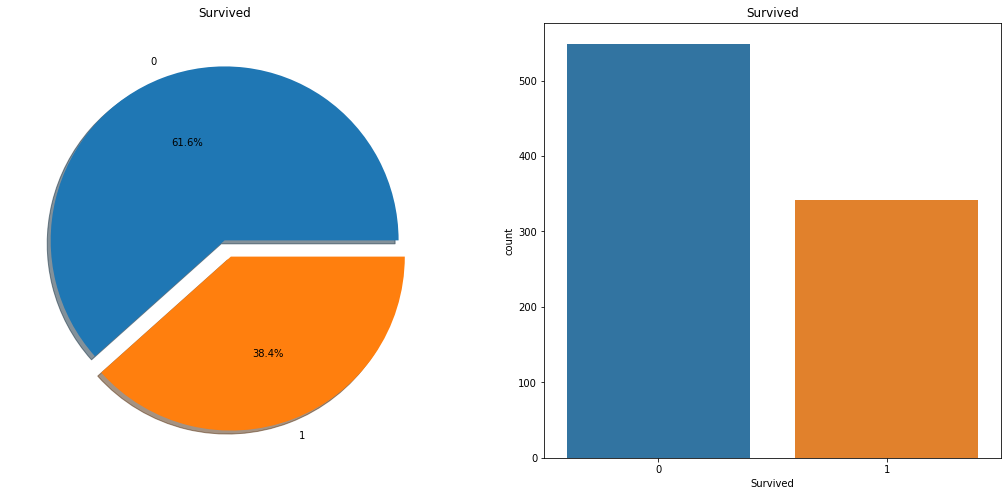

In [95]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

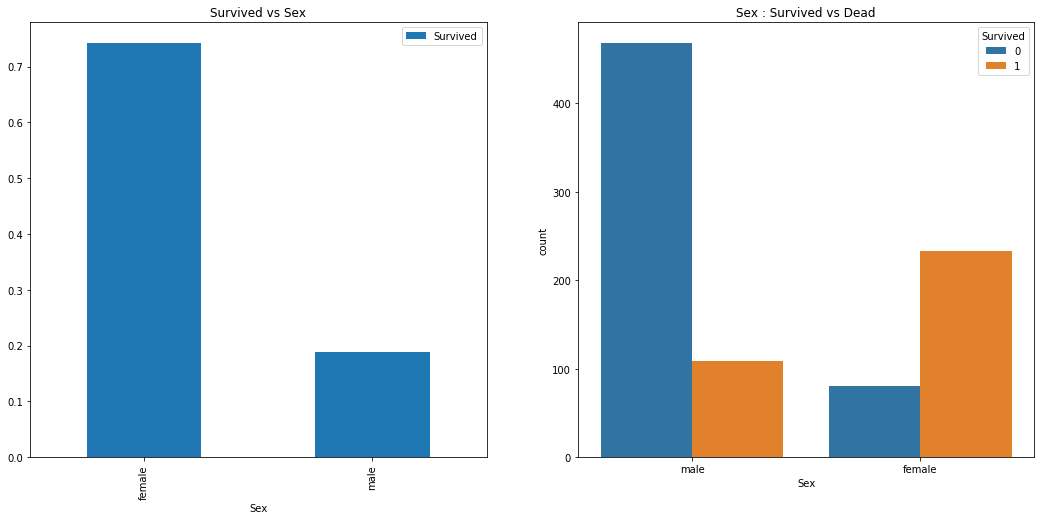

In [96]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(by=['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data)
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

### Pclass ---> Ordinal Featuree

In [97]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


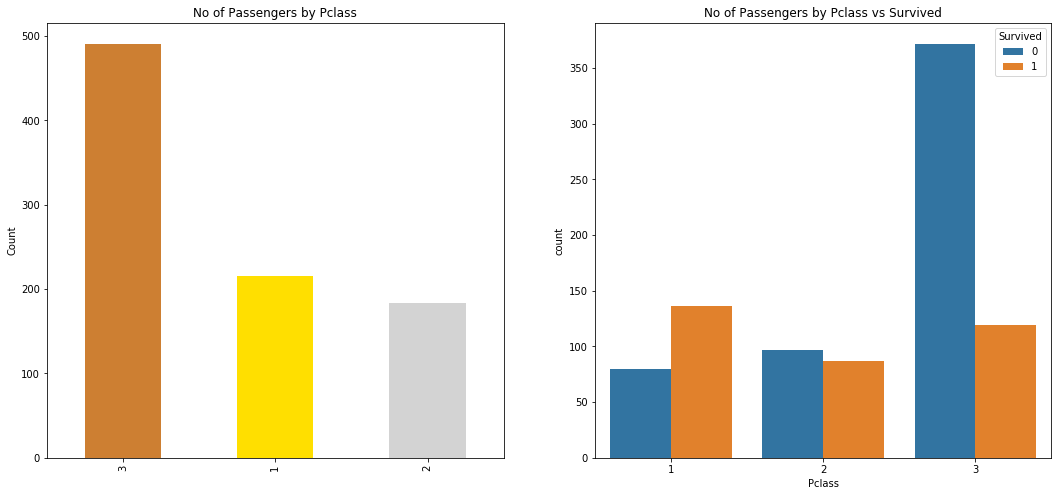

In [98]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(colors=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('No of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('No of Passengers by Pclass vs Survived')
plt.show()

In [99]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')


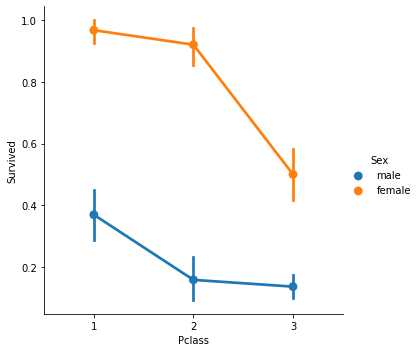

In [100]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Age --> Continous

In [101]:
print('Oldest passenger was of ',data['Age'].max(),'Years')
print('Youngest passenger was of ',data['Age'].min(),'Years')
print('Average Age on the ship was ',data['Age'].mean(),'Years')

Oldest passenger was of  80.0 Years
Youngest passenger was of  0.42 Years
Average Age on the ship was  29.69911764705882 Years


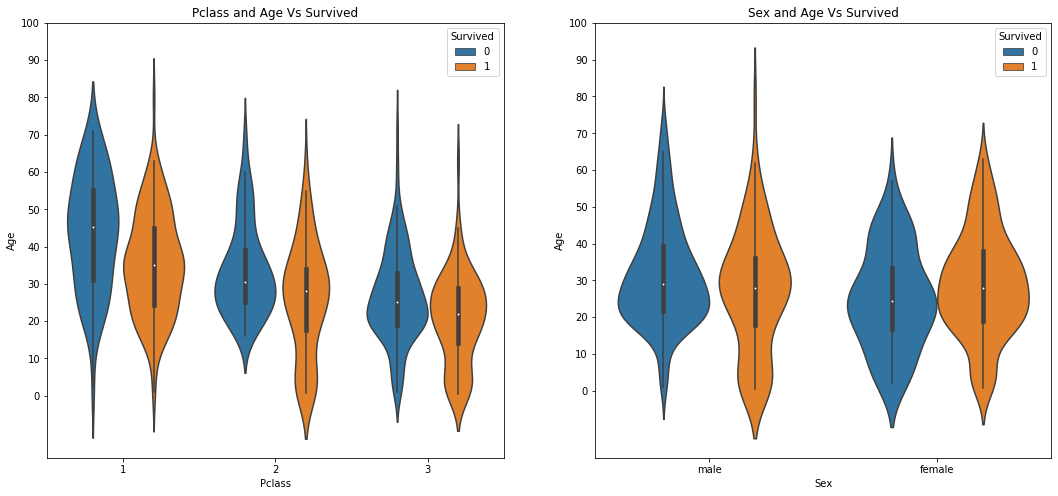

In [102]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Pclass and Age Vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex and Age Vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [103]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [104]:
pd.crosstab(data.Initial,data.Sex,margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [105]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt',
                        'Sir','Don'],['Miss','Miss','Miss','Mr',"Mr",'Mrs','Mrs','Other','Other','Other',
                                     'Mr','Mr','Mr'],inplace = True)

In [106]:
# Let's check the mean of age through Initails
print(data.groupby('Initial')['Age'].mean())

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64


### Filling NAN Values

In [107]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'),'Age'] = 46

In [108]:
#So no null values left
data.Age.isnull().any()

False

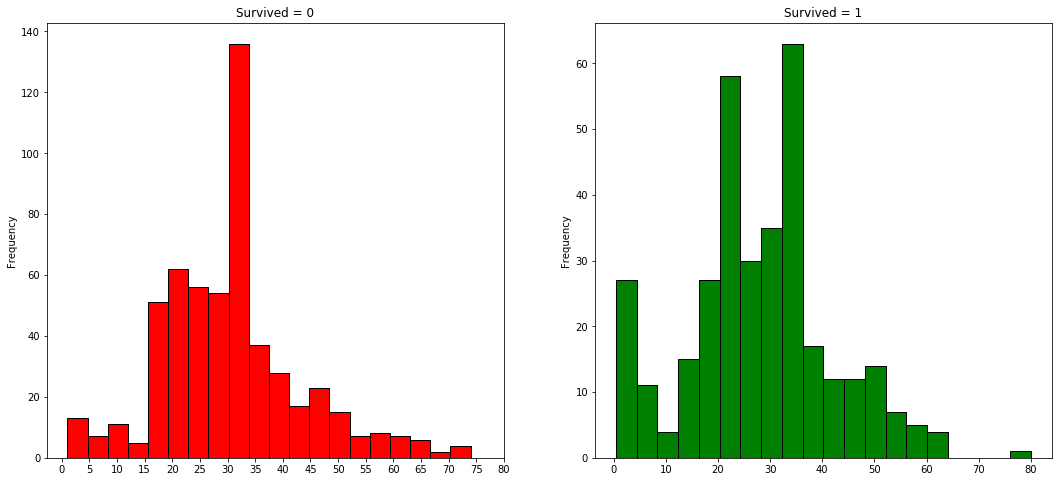

In [109]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,colors='red',edgecolor='black')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],bins=20,color='green',edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
plt.show()

### Observations

1) The Toddler (Age) <  5 were saved in large numbers(The women and the child policy)
2) The Oldest passenger was 80 yrs
3) Maximum death were in the age group 30 - 40

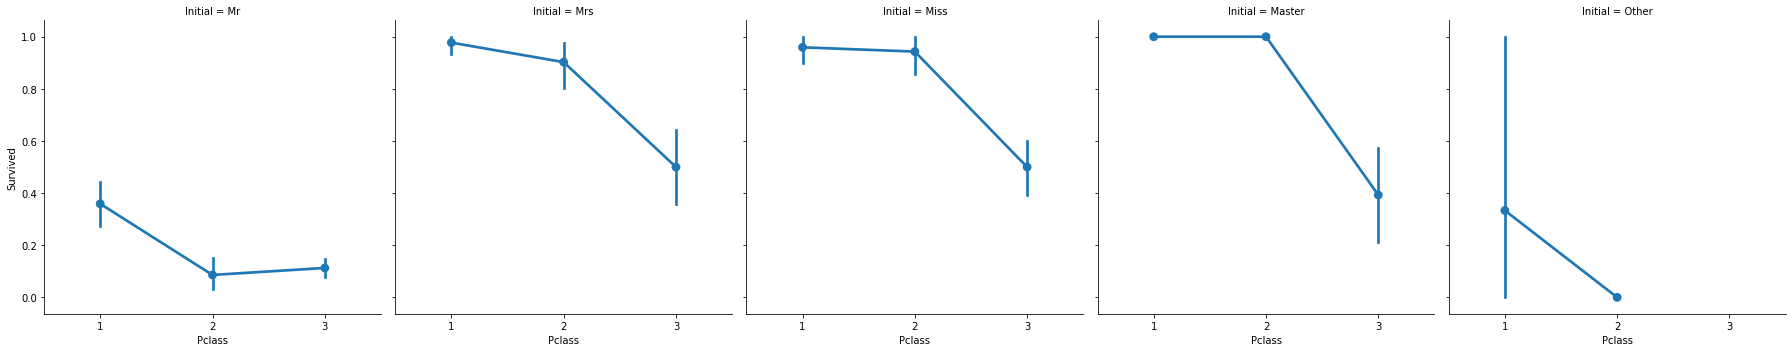

In [110]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Embarked -> Categorical

In [111]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

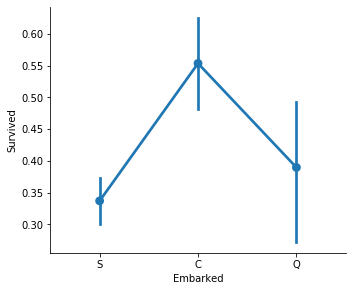

In [112]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,4)
plt.show()

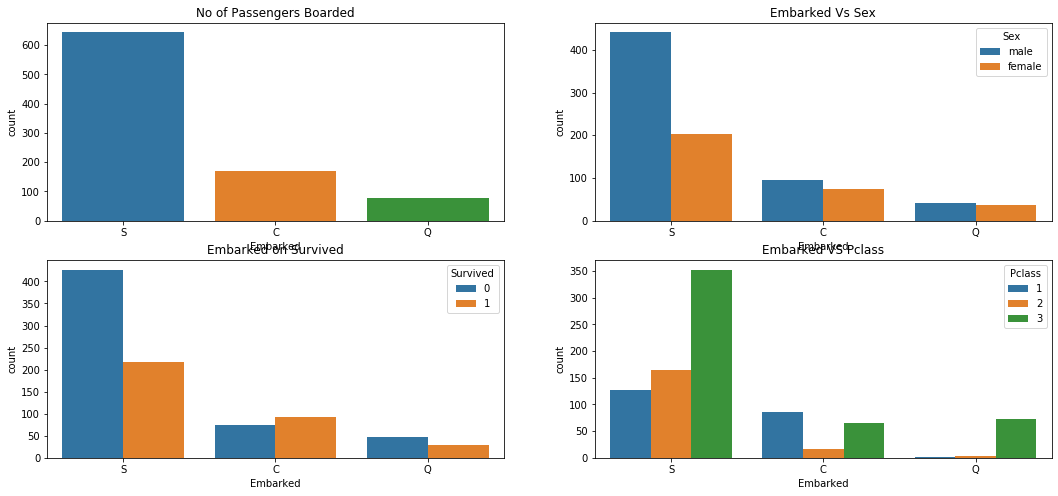

In [113]:
f,ax = plt.subplots(2,2,figsize=(18,8))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Embarked Vs Sex')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked on Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked VS Pclass')
plt.show()

### Observations

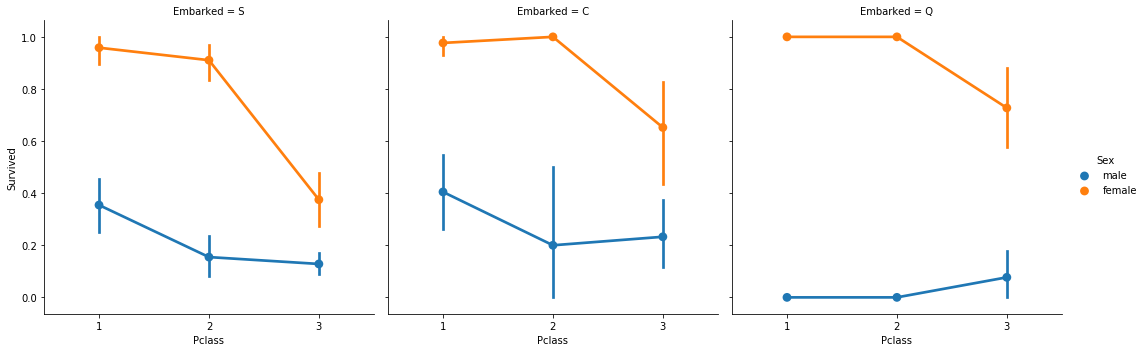

In [114]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### Observations

In [115]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

### Filling Embarked NAN Values

In [119]:
data['Embarked'].fillna('S', inplace=True)

In [120]:
data.Embarked.isnull().any()

False